# Random Forest
## Introduction 
Random Forest is an **ensemble learning technique** that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It is used for both **classification** and **regression** tasks.
## How Random Forest Works?
- It creates multiple Decision Trees on random subsets of data.
- Each tree makes a prediction.
- The final output is determined by:
    -   Majority voting (for classification).
    - Averaging predictions (for regression).

## Advantages of Random Forest
- Handles missing values and noisy data.
- Reduces overfitting (compared to a single decision tree).
- Works well with both categorical and numerical features.
- Can be used for feature importance analysis.

## Problem Statement
Predict whether an employee will leave the company based on various attributes like salary, work-life balance, job satisfaction, etc.

### Step 1: Data Loading

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Datasets/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Step 2: Data Preprocessing

In [3]:
df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [4]:
#convert categorical features to numerical using Label encoding
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

categorical_col = df.select_dtypes(include='object').columns

for col in categorical_col:
    df[col] = label.fit_transform(df[col])


In [5]:
X = df.drop('Attrition',axis= 1)
y = df['Attrition']

In [6]:
from sklearn.model_selection import train_test_split
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Perform Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees 
    'max_depth': [4,6,8], # Maximum depth of the tree
    'criterion': ['gini', 'entropy'] # criteria for split
}

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

In [9]:
# Perform the grid search over the parameters
GridSearch = GridSearchCV(rf_model, param_grid, cv=5)
GridSearch.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", GridSearch.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}


### Step 4: Train Random Forest Model with Best Parameters

In [10]:

# Train decision Tree Model
best_rf = RandomForestClassifier(n_estimators= GridSearch.best_params_['n_estimators'], criterion= GridSearch.best_params_['criterion'] , max_depth= GridSearch.best_params_['max_depth'], 
                                  random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

### Step 5: Evaluate Model Performance

In [11]:
#   Make prediction
y_pred = best_rf.predict(X_test)  

In [12]:
from sklearn.metrics import classification_report
# Accuracy and Classification Report
accuracy = best_rf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Model accuracy: 0.88

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



### Step 6: Feature Importance

In [13]:
# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

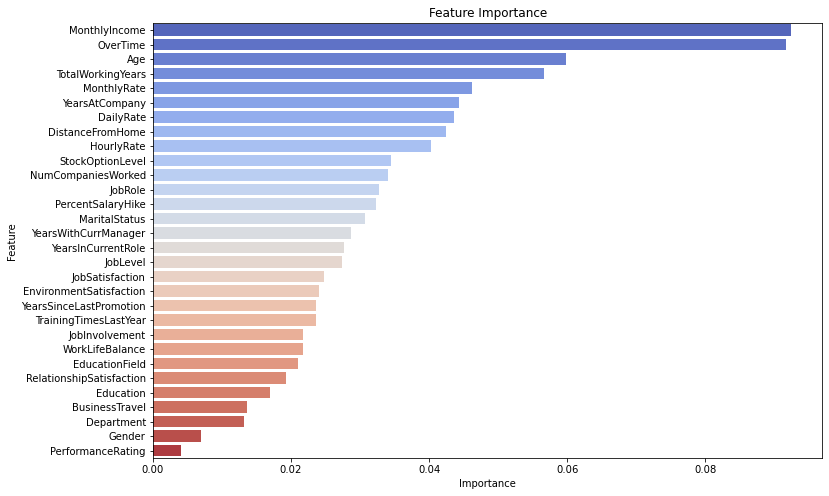

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature',hue='Feature', data=feature_importance,palette='coolwarm', legend=False)
plt.title('Feature Importance')
plt.savefig('Diagrams/Feature_importance_Random_Forest.png')
plt.show()


### Step 7: Save Model

In [15]:
import pickle

# Save the trained model and feature order
with open('Models/random_forest_HR_data.pkl', 'wb') as file:
    pickle.dump((best_rf, list(X.columns)), file)